## Setup

First, we set up our notebook by downloading the appropriate packages

### Dependencies

In [1]:
pip install matplotlib scipy pandas numpy networkx seaborn scikit-learn cython

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/b8/63/cef838d92c1918ae28afd12b8aeaa9c104a0686cf6447aa0546f7c6dd1f0/matplotlib-3.9.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/89/bb/80c9c98d887c855710fd31fc5ae5574133e98203b3475b07579251803662/scipy-1.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 718.1 kB/s eta 0:00:00 0:00:01
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/fc/a5/4d82be566f069d7a9a702dcdf6f9106df0e0b042e738043c0cc7ddd7e3f6/pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/d1/27/2a7bd6855dc717aeec5f553073a3c426b9c816126555f8e616392eab856b/numpy-2.0.0-cp311-cp311-manyli

### Imports

In [2]:
# base libraries
import importlib
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import os

import networkx as nx

import time

from IPython.utils.io import capture_output # supress outputs

from sklearn.metrics.cluster import adjusted_rand_score

### Fix pathway

In [3]:
# fix directory
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
os.chdir(parent_dir)

print("Current working directory:", os.getcwd())

from trcrpm.src import Hierarchical_TRCRP_Mixture, TRCRP_Mixture

Current working directory: /hdsi-collab-persistent/cephfs/Setup


### Helper Functions

1. **`run_model(data, num_chains = 8, p = 5, MCMC_steps=1000, hyperparam_steps=50, runtime = True)`**
    - **Returns**: Fitted model
        - The dataframe index needs to be reset as an integer.
        - Choose a high number for `MCMC_steps` to allow for a burn-in period.
        - `p` is our lag window

2. **`post_dep(model, num_samples)`**
    - **Returns**: Pairwise posterior dependence matrices (cluster probabilities)
        - The array is of size `NUM_SAMPLES x NUM_CHAINS x LEN(DF) x LEN(DF)`

3. **`clustering(post_probs, threshold = 0.75)`**
    - **Returns**: Clusters
        - If time series `i` and `k` are dependent in `threshold%` of samples, they are clustered together.
        - Averages over `NUM_SAMPLES` and `NUM_CHAINS`.

4. **`return_ari(true_labels, predicted_clusters)`**
    - **Returns**: Adjusted Rand Index (ARI) if ground truth is available


In [4]:
import importlib

In [5]:
import experiments.helper_functions as helpers
importlib.reload(helpers)

<module 'experiments.helper_functions' from '/hdsi-collab-persistent/cephfs/Setup/experiments/helper_functions.py'>

## Data Generation (Sin Waves)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,1.000000,2.000000,3.000000,4.000000,0.000000,1.000000,2.000000,3.000000,4.000000,...,0.000000,1.000000,2.000000,3.000000,4.000000,0.000000,1.000000,2.000000,3.000000,4.000000
1,-0.698144,1.831668,0.472422,-3.802767,0.544449,0.750673,2.066067,0.861154,-3.505504,0.186639,...,0.337993,2.839012,1.290963,-3.674295,-0.191486,-0.290226,1.929890,0.368061,-4.146266,0.274521
2,-0.371716,2.312660,-1.425879,-2.821181,3.588774,-0.251313,1.655546,-0.568162,-4.644933,3.442799,...,0.057098,1.708815,-1.020217,-2.498662,3.195326,0.619083,1.903530,-0.579250,-3.205341,3.642986
3,0.274139,1.180214,-1.748126,-1.687771,4.760186,-0.155657,1.967437,-1.240357,-2.093047,5.452983,...,0.567657,2.214973,-0.911351,-1.607222,4.345932,-0.215621,1.739628,-1.543670,-1.620886,4.631732
4,0.151679,1.909324,-2.633894,0.437457,5.194412,0.815974,1.339022,-2.719934,0.214386,4.865197,...,0.089310,2.107303,-1.935796,-0.339310,4.993724,0.435381,1.724237,-2.751674,-0.438276,4.760058


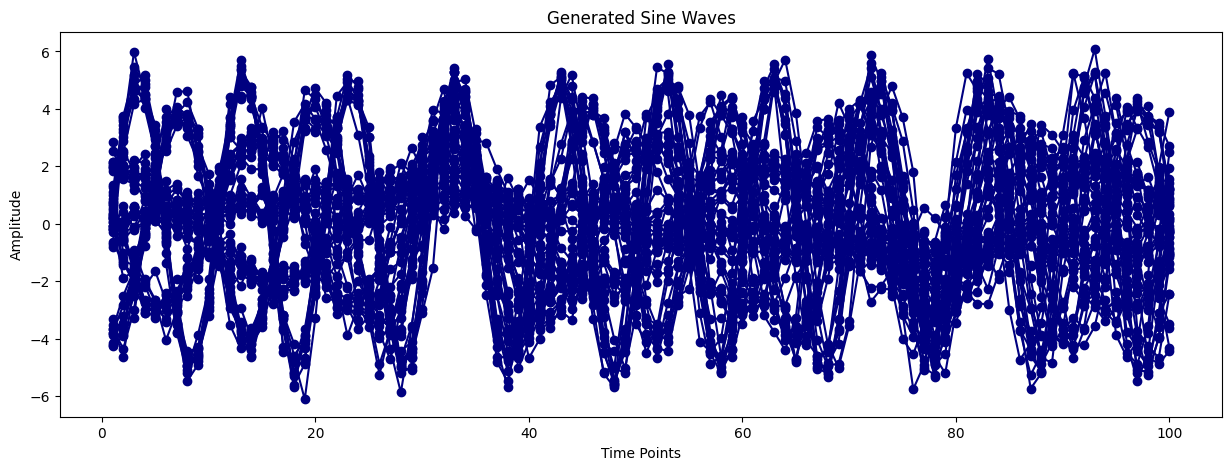

In [6]:
import experiments.data_generation as data_gen
importlib.reload(data_gen)

df = data_gen.generate_sine_wave_data(frequency_noise=0.1, random_state=42, use_colors = False)
df.head()

## Run Analysis

In [7]:
data = df.iloc[1:]
labels = df.iloc[0].values

print(data.shape) # NUM_OBSERVATIONS X NUM_TIMESEREIES

(100, 50)


In [8]:
model = helpers.run_model(data)

MCMC inference time: 7 minutes and 55 seconds
Hyperparameter optimization time: 4 minutes and 11 seconds


In [9]:
dep_matrices = helpers.post_dep(model, 20)

Sampling Time: 2 minutes and 25 seconds


In [10]:
# compare predicted and true clusters

In [11]:
predicted_clusters = helpers.clustering(dep_matrices, threshold = 0.75)
predicted_clusters

[{0, 5, 10, 15, 20, 25, 30, 35, 40, 45},
 {1, 6, 11, 16, 21, 26, 31, 36, 41, 46},
 {2, 7, 12, 17, 22, 27, 32, 37, 42, 47},
 {3, 8, 13, 18, 23, 28, 33, 38, 43, 48},
 {4, 9, 14, 19, 24, 29, 34, 39, 44, 49}]

In [12]:
helpers.return_ari(labels, predicted_clusters)

1.0

In [13]:
unique_labels = np.unique(labels)
# step size (number of elements per cluster)
step = len(labels) // len(unique_labels)

# clusters as list 
clusters = [[int(label) for label in np.where(labels == label)[0]] for label in unique_labels]
clusters

[[0, 5, 10, 15, 20, 25, 30, 35, 40, 45],
 [1, 6, 11, 16, 21, 26, 31, 36, 41, 46],
 [2, 7, 12, 17, 22, 27, 32, 37, 42, 47],
 [3, 8, 13, 18, 23, 28, 33, 38, 43, 48],
 [4, 9, 14, 19, 24, 29, 34, 39, 44, 49]]

## Plotting


In [14]:
import plotting_functions as plot
importlib.reload(plot)

<module 'plotting_functions' from '/hdsi-collab-persistent/cephfs/Setup/experiments/plotting_functions.py'>

In [15]:
# %%capture
# # need to simulate samples for confidence interval
# # we sample from the posterior to get confidence interval for forecasted values
# # some bug inside .simulate so supressing outputs for now
# # bug is in cgpm.src.crosscat.sampling (print statement in simulate_row)
# probes = model.dataset.index
# numsamples = 10
# samples = model.simulate(probes, model.variables, numsamples)

### Helper Functions 

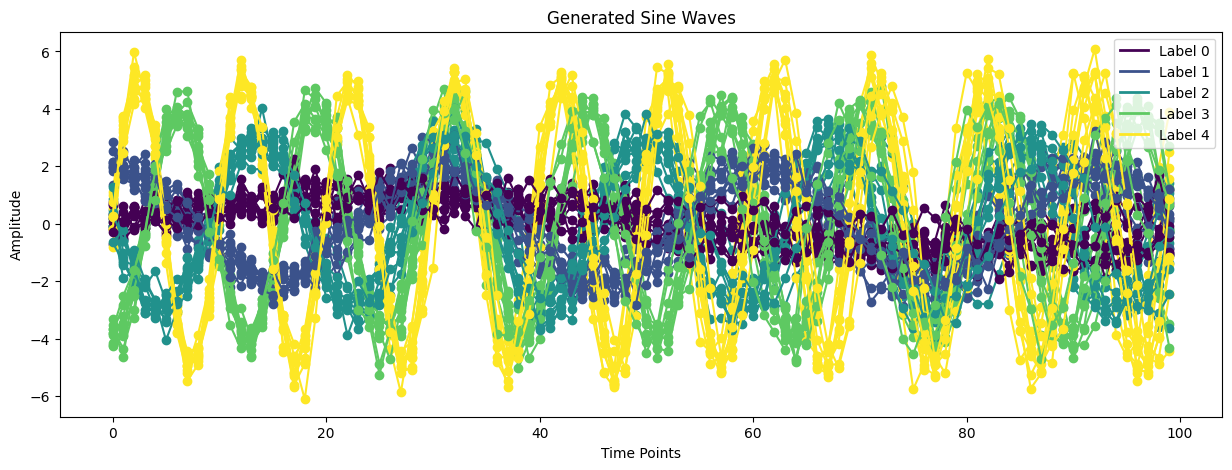

In [16]:
# compare labels with predicted_labels
plot.plot_df(data, labels)
#lot.plot_df(data, predicted_labels)

In [17]:
plot.plot_cluster_variables(samples, [1, 6, 26, 41], ax, states_from_chain=2)


NameError: name 'samples' is not defined